In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
cols = ['protein_seq','type']
df = pd.read_csv('../data/sequences_training.txt')
df.columns = cols

In [3]:
u = pd.unique(df['type'])
n = df.nunique(axis = 0)
print(f"unique types {u}")
print(f"number of unique entries in each column:\n{n}")
print(f"value distribution of each type:\n{df['type'].value_counts()}")

unique types ['DNA' 'RNA' 'DRNA' 'nonDRNA']
number of unique entries in each column:
protein_seq    8794
type              4
dtype: int64
value distribution of each type:
nonDRNA    7859
RNA         523
DNA         390
DRNA         22
Name: type, dtype: int64


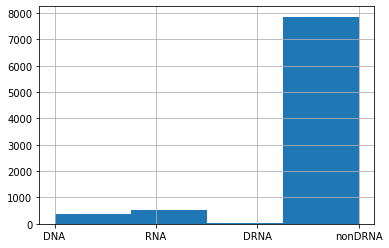

In [4]:
hist = df['type'].hist(bins = 4)

In [5]:
#create histogram based on the length of string sequences
data = df
data['seq_len'] = df['protein_seq'].str.len()
data

,protein_seq,type,seq_len
0,MAAAKAEMQLMSPLQISDPFGSFPHSPTMDNYPKLEEMMLLSNGAP...,DNA,533
1,MAAELAMGAELPSSPLAIEYVNDFDLMKFEVKKEPPEAERFCHRLP...,DNA,353
2,MAAGTAVGAWVLVLSLWGAVVGAQNITARIGEPLVLKCKGAPKKPP...,DNA,404
3,MAAPILFWHRRDLRLSDNIGLAAARAQSAQLIGLFCLDPQILQSAD...,DNA,484
4,MAARKQSSQPSRTPVSYEDVAVSFTQEEWEYLTSTQKTLYQKVMSE...,DNA,421
...,...,...,...
8789,YKVTLKTPSGEETIECPEDTYILDAAEEAGLDLPYSCRAGACSSCA...,nonDRNA,94
8790,YLDHGLGAPAPYPDPLEPRREVCELNPDCDELADHIGFQEAYRRFYGIA,nonDRNA,49
8791,YNSGKLEESFVRGNLERECIEEKCSFEEAREVFENTEKTNEFWKQY...,nonDRNA,409
8792,YPESIDWREKGAVTPVKNQNPCGSCWAFSTVATIEGINKIITGQLI...,nonDRNA,214


<AxesSubplot:>

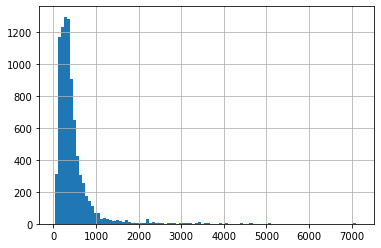

In [6]:
data['seq_len'].hist(bins=100)

<AxesSubplot:xlabel='type', ylabel='seq_len'>

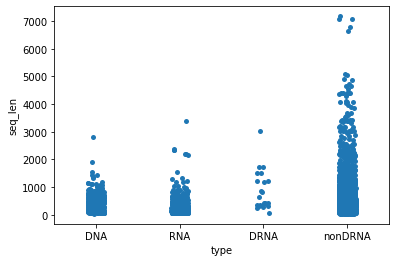

In [7]:
sns.stripplot(x = data['type'], y = data['seq_len'], data = data)

<AxesSubplot:xlabel='type', ylabel='first_letter'>

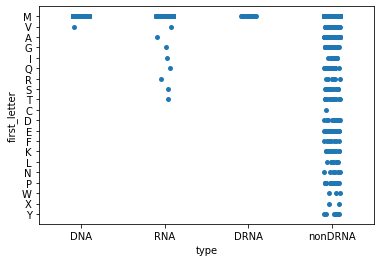

In [8]:
data['first_letter'] = df['protein_seq'].astype(str).str[0]
#print(f"value distribution of each first letter:\n{df['first_letter'].value_counts()}")
#compare labels based on the value of the first label
sns.stripplot(x = data['type'], y = data['first_letter'], data = data)

<AxesSubplot:xlabel='type', ylabel='3_letters'>

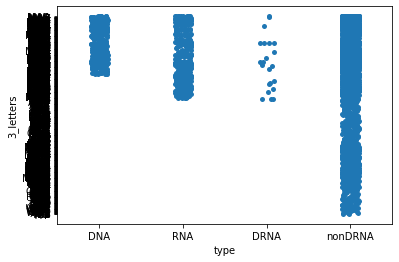

In [9]:
data['3_letters'] = df['protein_seq'].astype(str).str[0:3]
sns.stripplot(x = data['type'], y = data['3_letters'], data = data)

In [10]:
#identify subgroups within the sequence
#quantify subgroups compared to labels
#Plot
#maybe
dna = pd.DataFrame
dna = data.loc[data['type'] == 'DNA']
nondna = data.loc[data['type'] == 'nonDRNA']
rna = data.loc[data['type'] == 'RNA']
drna = data.loc[data['type'] == 'DRNA']


<class 'collections.Counter'>


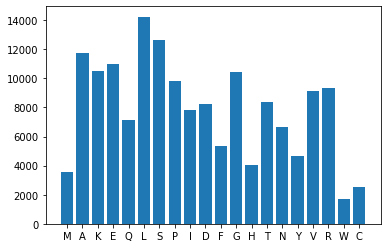

In [11]:
from collections import Counter
dna_freqs = dna['protein_seq'].apply(Counter)
dna_freqs = dna_freqs.sum()
#dna_freqs.to_dict()
print(type(dna_freqs))
plt.bar(list(dna_freqs.keys()),dna_freqs.values())
plt.show()

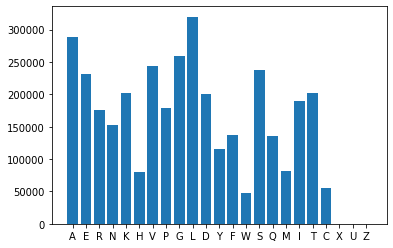

In [12]:
nondna_freqs = nondna['protein_seq'].apply(Counter)
nondna_freqs = nondna_freqs.sum()
plt.bar(list(nondna_freqs.keys()),nondna_freqs.values())
plt.show()

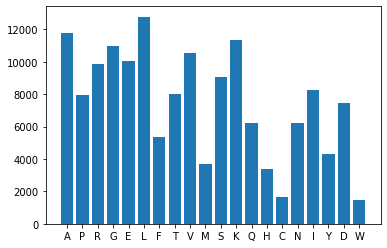

In [13]:
rna_freqs = rna['protein_seq'].apply(Counter)
rna_freqs = rna_freqs.sum()
plt.bar(list(rna_freqs.keys()),rna_freqs.values())
plt.show()

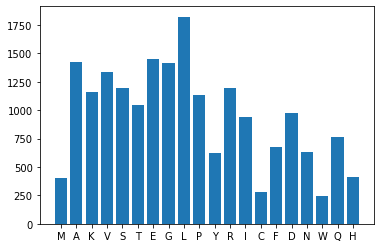

In [14]:
drna_freqs = drna['protein_seq'].apply(Counter)
drna_freqs = drna_freqs.sum()
plt.bar(list(drna_freqs.keys()),drna_freqs.values())
plt.show()

In [16]:
amino_acids_groups = {
                        'nonpolar': ['G','A','V','L','I','P','F','M','W'],
                        'polar'   : ['S','C','T','N','Q'],
                        'acidic'  : ['D','E'],
                        'basic'   : ['R','H','K']                    
                     }